In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [45]:
g = 9.81

def read_acc_export(path):
    data = [np.genfromtxt(entry.path, delimiter='\t') 
            for entry in os.scandir(path) 
            if entry.is_file()]

    def slicing(entries):
        '''slice each data read from txt to have equal 2D shape.'''
        length = np.empty(len(entries))

        for i in range(len(entries)):
            length[i] = len(entries[i])

        for i in range(len(entries)):
            entries[i] = entries[i][:int(min(length)), :]
        return entries

    data = slicing(data)
    data = np.stack(data, axis=0)
    averaged = np.mean(data, axis=0)
    averaged = np.delete(averaged, 0, 1)*g
    return averaged

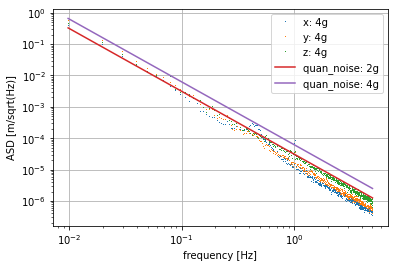

In [55]:
averaged4g = read_acc_export("measurements/10Hz")
fs = 10
f2g, Pxx_den4g = signal.welch(averaged4g, fs, nperseg=1024, axis=0)
Axx_den4g = np.sqrt(Pxx_den4g)
omega = 2*np.pi*f4g[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

quan_noise_2g = (4/2**12*g)**2/6/fs
quan_noise_4g = (8/2**12*g)**2/6/fs


# fig, (ax1, ax2) = plt.subplots(figsize=(8,8), nrows=2)
labels = ['x', 'y', 'z']
for i, label in enumerate(labels):
    plt.loglog(f4g[1:], Axx_den4g[1:, i]*mag, ',',label=label+ ": 4g")
plt.loglog(f4g[1:], np.sqrt(quan_noise_2g)*mag, label='quan_noise: 2g')
plt.loglog(f4g[1:], np.sqrt(quan_noise_4g)*mag, label='quan_noise: 4g')
plt.ylabel('ASD [m/sqrt(Hz)]')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.grid()
plt.show()
# for i, label in enumerate(labels):
#     ax2.semilogx(f[1:], phase/np.pi*180, label=label)
# ax2.set_ylabel('Phase [degree]')
# ax2.set_xlabel('frequency [Hz]')
# ax2.legend()
# plt.show()

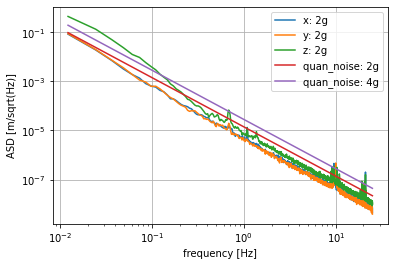

In [64]:
averaged2g = read_acc_export("measurements/50Hz")
# data = [np.genfromtxt(entry.path, delimiter='\t') 
#             for entry in os.scandir("measurements/50Hz") 
#             if entry.is_file()]
# test = data[5]
fs = 50
quan_noise_2g = (4/2**12*g)**2/6/fs
quan_noise_4g = (8/2**12*g)**2/6/fs
f2g, Pxx_den2g = signal.welch(averaged2g, fs, nperseg=4096, axis=0)
Axx_den2g = np.sqrt(Pxx_den2g)
omega = 2*np.pi*f2g[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

for i, label in enumerate(labels):
    plt.loglog(f2g[1:], Axx_den2g[1:, i]*mag, '-',label=label+ ": 2g")
plt.loglog(f2g[1:], np.sqrt(quan_noise_2g)*mag, label='quan_noise: 2g')
plt.loglog(f2g[1:], np.sqrt(quan_noise_4g)*mag, label='quan_noise: 4g')
plt.ylabel('ASD [m/sqrt(Hz)]')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.grid()
plt.show()


In [49]:
averaged2g.shape

(60001, 3)

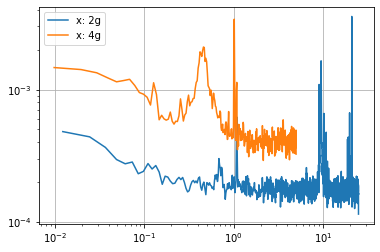

In [53]:
plt.loglog(f2g[1:], Axx_den2g[1:, 0], label="x: 2g")
plt.loglog(f4g[1:], Axx_den4g[1:, 0], label="x: 4g")
plt.legend()
plt.grid()

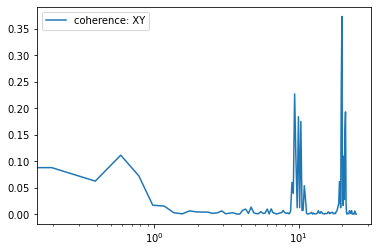

In [23]:
f_xy, cohXY = signal.coherence(averaged[:,0], averaged[:,1], fs=fs, nperseg=256)

plt.semilogx(f_xy, cohXY, label='coherence: XY')
plt.legend()